In [1]:
#Image Classification using BrainTumor Dataset

In [3]:
#IMPORT STUFF
import tensorflow as tf
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from tensorflow import keras
from sklearn.model_selection import train_test_split

In [5]:
#DATAGEN
datagen = ImageDataGenerator(
    rescale = 1./255,
    validation_split=0.2
)

In [31]:
#TRAIN GENERATOR
train_generator = datagen.flow_from_directory(
    r'C:\Users\SIDHARTH KUMTHEKAR\Desktop\SEM-7\DL-3\Brain Tumor\Training',
    target_size=(64,64),
    class_mode='categorical',
    batch_size=32
)

Found 2870 images belonging to 4 classes.


In [32]:
#TEST GENERATOR
test_generator = datagen.flow_from_directory(
    r'C:\Users\SIDHARTH KUMTHEKAR\Desktop\SEM-7\DL-3\Brain Tumor\Testing',
    target_size=(64,64),
    batch_size=32,
    class_mode='categorical'
    
)

Found 394 images belonging to 4 classes.


In [13]:
#TRAIN THE MODEL

In [42]:
model = keras.Sequential([
    keras.layers.Conv2D(filters=64,kernel_size=2,strides=(2,2),padding='valid',activation='relu',input_shape=(64,64,3)),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Conv2D(filters=32,kernel_size=2,strides=(2,2),padding='valid',activation='relu'),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(128,activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(64,activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(4,activation='softmax'),
])

In [43]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_11 (Conv2D)          (None, 32, 32, 64)        832       
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 16, 16, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_12 (Conv2D)          (None, 8, 8, 32)          8224      
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 4, 4, 32)          0         
 ng2D)                                                           
                                                                 
 flatten_3 (Flatten)         (None, 512)               0         
                                                                 
 dense_6 (Dense)             (None, 128)              

In [44]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [45]:
x_train,y_train =train_generator[0]
x_test,y_test = test_generator[0]


In [46]:
#fit the model
model.fit(x_train,y_train,epochs=30)

Epoch 1/30
1/1 [==============================] - 2s 2s/step - loss: 1.3943 - accuracy: 0.1562
Epoch 2/30
1/1 [==============================] - 0s 81ms/step - loss: 1.3712 - accuracy: 0.3438
Epoch 3/30
1/1 [==============================] - 0s 73ms/step - loss: 1.3689 - accuracy: 0.3750
Epoch 4/30
1/1 [==============================] - 0s 61ms/step - loss: 1.3419 - accuracy: 0.5312
Epoch 5/30
1/1 [==============================] - 0s 71ms/step - loss: 1.3562 - accuracy: 0.4062
Epoch 6/30
1/1 [==============================] - 0s 58ms/step - loss: 1.3255 - accuracy: 0.5625
Epoch 7/30
1/1 [==============================] - 0s 86ms/step - loss: 1.2929 - accuracy: 0.5312
Epoch 8/30
1/1 [==============================] - 0s 59ms/step - loss: 1.2883 - accuracy: 0.5312
Epoch 9/30
1/1 [==============================] - 0s 84ms/step - loss: 1.2637 - accuracy: 0.5625
Epoch 10/30
1/1 [==============================] - 0s 70ms/step - loss: 1.2245 - accuracy: 0.6250
Epoch 11/30
1/1 [==============

In [49]:
model.evaluate(x_test,y_test)

1/1 [==============================] - 0s 74ms/step - loss: 4.3645 - accuracy: 0.6875


[4.364465713500977, 0.6875]

In [ ]:
plt.imshow(x_test[1])
ans = model,predict(x_test)
print('actual value',np.argmax(y_test[1]))
print(np.argmax(ans[1 ]))

In [48]:
model.fit(train_generator,validation_data=test_generator,epochs=30)

Epoch 1/30
90/90 [==============================] - 44s 474ms/step - loss: 1.1267 - accuracy: 0.5038 - val_loss: 1.8725 - val_accuracy: 0.2665
Epoch 2/30
90/90 [==============================] - 23s 251ms/step - loss: 0.9279 - accuracy: 0.5944 - val_loss: 1.8595 - val_accuracy: 0.2589
Epoch 3/30
90/90 [==============================] - 24s 267ms/step - loss: 0.7717 - accuracy: 0.6557 - val_loss: 1.7906 - val_accuracy: 0.2919
Epoch 4/30
90/90 [==============================] - 23s 254ms/step - loss: 0.6687 - accuracy: 0.7143 - val_loss: 2.0230 - val_accuracy: 0.3503
Epoch 5/30
90/90 [==============================] - 23s 256ms/step - loss: 0.5778 - accuracy: 0.7631 - val_loss: 1.9449 - val_accuracy: 0.3959
Epoch 6/30
90/90 [==============================] - 24s 268ms/step - loss: 0.5450 - accuracy: 0.7672 - val_loss: 1.8277 - val_accuracy: 0.4594
Epoch 7/30
90/90 [==============================] - 23s 250ms/step - loss: 0.4854 - accuracy: 0.8000 - val_loss: 1.8493 - val_accuracy: 0.4645

In [50]:
#train and validation generator training is better


1/1 [==============================] - 0s 47ms/step
actual class 1
predicted class 1
1


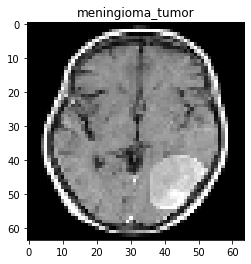

In [73]:
import random
r=random.randint(0,32)

plt.imshow(x_test[r])
ans = model.predict(x_test)
print('actual class', np.argmax(y_test[r]))
print('predicted class',np.argmax(ans[r]))
classy  = np.argmax(ans[r])
print(classy)

if(classy==0):
    plt.title('giloma_tumor')

if(classy==1):
    plt.title('meningioma_tumor')

if(classy==2):
    plt.title('no_tumor')

if(classy==3):
    plt.title('pituitary tumor')
